## PCA Notebook
##### By Gregory Glickert

### PCA reduces the dimensionality of a dataset while keeping the trends (variance) present in the data. You can think of it kinda like compression, but it also allows up to more easily visualize high dimension data. It uses some fancy matrix magic to work, but the details are not important for understanding it. Lets start with a simple example!

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) 

# downloads repo so we have the picture
if RunningInCOLAB: 
    !git clone https://github.com/CyNeuro/Neural-Networks_Machine_Learning.git &> /dev/null 
    %cd Neural-Networks_Machine_Learning/PCA/

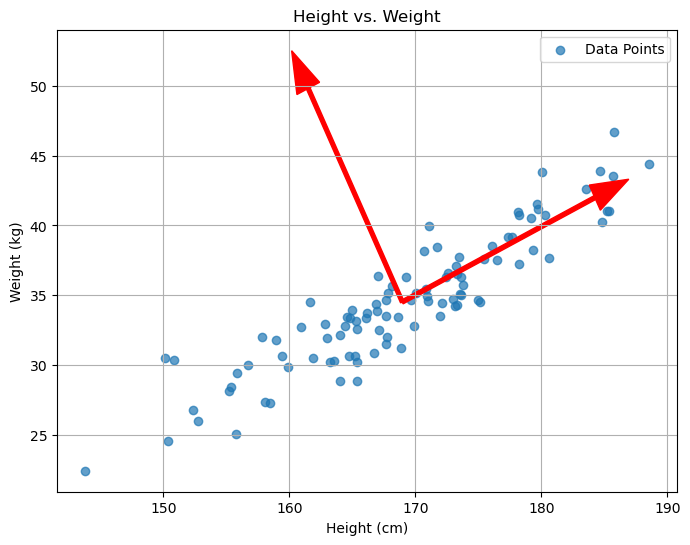

Explained variance ratio by each principal component: [0.97219549 0.02780451]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)
height = np.random.normal(170, 10, 100)
weight = 0.5 * height - 50 + np.random.normal(0, 2, 100) 

X = np.vstack((height, weight)).T

# Plot the original height and weight data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, label="Data Points")
plt.title("Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True)

# Perform PCA to reduce the dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the principal components
mean_height_weight = np.mean(X, axis=0)  # Calculate the mean of height and weight
for i in range(2):
    plt.arrow(mean_height_weight[0], mean_height_weight[1],
              pca.components_[i, 0] * 20, pca.components_[i, 1] * 20,  # Scale for visibility
              color='r', width=0.3, head_width=2, length_includes_head=True)

plt.legend()
plt.show()

# Print the explained variance ratio
print("Explained variance ratio by each principal component:", pca.explained_variance_ratio_)


## Here we run PCA on some data I made up. Note the very high explained variance for the first PC. If you only had PC one you would be able understand roughly how the data would look.

## Now lets look at a much cooler example that I think makes why PCA is important much more obvious (and was just cool in general)

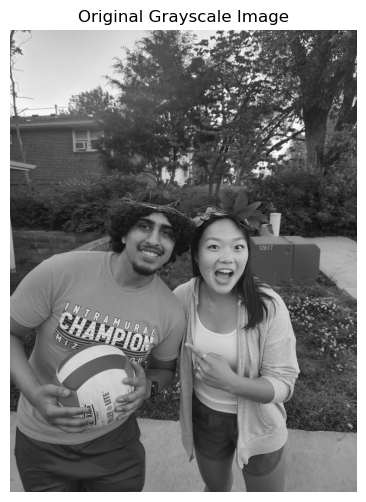

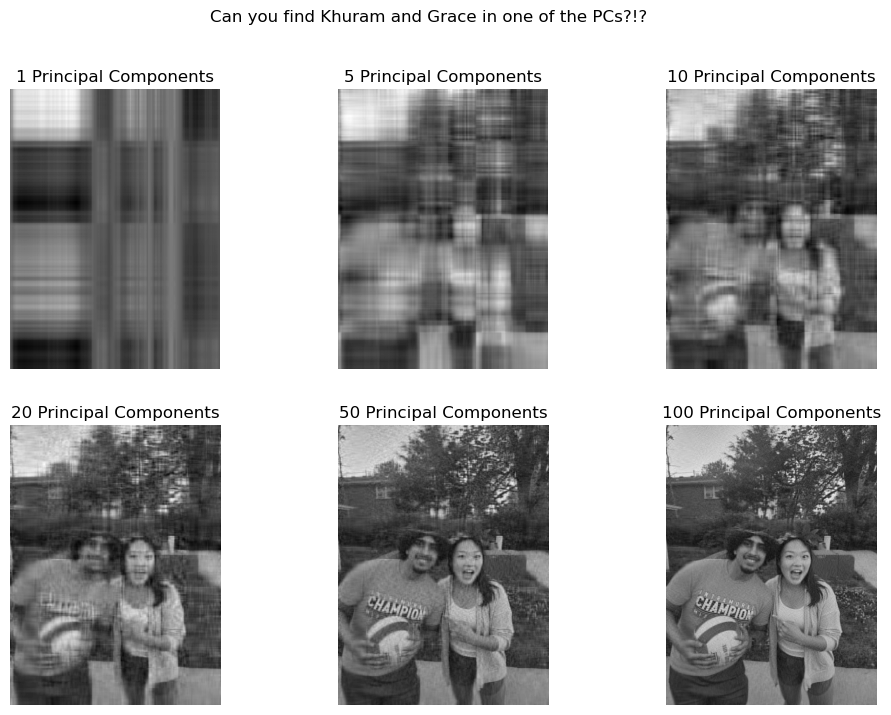

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image
from PIL import Image

#image = load_sample_image('flower.jpg')
image_path = 'pic.jpg'
image = Image.open(image_path)
image = image.rotate(270, expand=True)
gray_image = np.mean(image, axis=2)

# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Apply PCA to decompose the image
pca = PCA(n_components=100)  # num of PC
image_pca = pca.fit_transform(gray_image)

# Reconstruct the image using the first few principal components
def reconstruct_image(pca_model, pca_transformed, num_components):
    approx = pca_transformed[:, :num_components].dot(pca_model.components_[:num_components, :])
    approx += pca_model.mean_  # Add the mean back to the data
    return approx

# Plot the reconstructed images using different numbers of principal components
components_to_show = [1, 5, 10, 20, 50, 100]  # Different levels of reconstruction
plt.figure(figsize=(12, 8))
for i, num_components in enumerate(components_to_show, 1):
    approx_image = reconstruct_image(pca, image_pca, num_components)
    plt.subplot(2, 3, i)
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'{num_components} Principal Components')
    plt.axis('off')

#
plt.suptitle("Can you find Khuram and Grace in one of the PCs?!?")
plt.show()


## You can see that at around 20 PCs we can make out that the picture has Khuram and Grace in it. These 20 PCs are of a reduced dimensionality compared to our original gray scaled imaged, but still contain all the needed info we need from the picture. We can apply this same idea to neuroscience. A more neuroscience example is taking all of the different neurons firing and doing a PCA on that.